## Import Relevant Libraries

In [2]:
import os
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd

2021-11-08 17:48:53.342101: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-08 17:48:53.342135: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Parse Log file

In [3]:
def choose_log_file():
    data = list()
    filename = './1 - Logs Here/access.log.1'
    file = open(filename, 'r')
    lines = file.read().splitlines()
    file.close()
    for line in lines:
        if not line:
            continue
        substring = '"-"'
        columns2 = [col.strip() for col in line.split('"-"') if col]
        while substring in columns2:
            columns2 = [col.strip() for col in columns2.split('"-"') if col]
        impData = columns2[0]
        impData2 = [col.strip() for col in impData.split(' - - ')]
        testString = impData2[1].split('"')
        date = testString[0].strip(' ')
        request = testString[1]
        requestResponseCode = testString[2].split(' ')
        
        try:
            requestResponseCodeShortened = requestResponseCode[1]
        except:
            requestResponseCodeShortened = np.nan
            
        if requestResponseCodeShortened == '200' or requestResponseCodeShortened == '201' or requestResponseCodeShortened == '202':
            columnToAdd = '0'
        else:
            columnToAdd = '1'
        data.append([impData2[0],date,request,requestResponseCodeShortened,columnToAdd])
    print('Log successfully parsed!')
    
    df = pd.DataFrame(data=data)
    return np.array(data), df

dataset, df = choose_log_file()

Log successfully parsed!


In [5]:
df

,IP,Datetime,Request,StatusCode,Target
0,208.80.193.39,[25/May/2010:16:50:33 +0100],GET / HTTP/1.0,403,1
1,82.80.249.160,[25/May/2010:22:48:54 +0100],GET / HTTP/1.1,403,1
2,198.186.192.44,[26/May/2010:02:13:20 +0100],GET / HTTP/1.1,403,1
3,66.249.71.179,[26/May/2010:03:36:51 +0100],GET /robots.txt HTTP/1.1,403,1
4,66.249.71.179,[26/May/2010:03:36:52 +0100],GET / HTTP/1.1,403,1
...,...,...,...,...,...
37733,95.92.55.235,[30/Apr/2012:16:59:58 +0100],GET /img/social2/rss.png HTTP/1.1,200,0
37734,95.92.55.235,[30/Apr/2012:16:59:58 +0100],GET /img/nav-left.jpg HTTP/1.1,200,0
37735,95.92.55.235,[30/Apr/2012:16:59:58 +0100],GET /img/nav-right.jpg HTTP/1.1,200,0
37736,95.92.55.235,[30/Apr/2012:16:59:58 +0100],GET /img/honeycomb.jpg HTTP/1.1,200,0


In [4]:
df.columns = ['IP', 'Datetime', 'Request', 'StatusCode', 'Target']
df = df.dropna()
df.shape

(37737, 5)

### Save Training Dataset into CSV (Optional)

In [7]:
df.to_csv('./training_dataset.csv')

## Data Modeling

### Split dataset into classes and target

In [7]:
x = df.values[:,0:4]
y = df.values[:,4]
df.values[:,3:5] = df.values[:,3:5].astype(str)
print(x.shape)
print(y.shape)

(37737, 4)
(37737,)


### One hot encoding for classes

In [8]:
#encode the x dataset
# Get unique classes (encuentra los elementos unicos en el array).
x_dataset_base = x
y_dataset_base = y
x_dataset_ips = x_dataset_base[:,0]
x_dataset_dates = x_dataset_base[:,1]
uniqueValues = np.unique(x_dataset_ips)
classes = np.unique(x)
#for value in x_dataset_ips:

# Replace classes with integers.
x = np.searchsorted(classes, x)
inputColumnQuantityVariables = len(x[0])

#encode the y dataset
y = np.array(y.astype(int))

In [10]:
x

array([[  738, 15855,  1803,   965],
       [ 1471, 15856,  1804,   965],
       [  490, 16164,  1804,   965],
       ...,
       [ 1796, 17654,  3105,   543],
       [ 1796, 17654,  3086,   543],
       [ 1796, 17654,  3114,   543]])

## Model

### Define Sequential Model

In [9]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=inputColumnQuantityVariables, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation= 'relu'))
model.add(Dense(6, activation= 'relu'))
model.add(Dense(4, activation= 'relu'))
model.add(Dense(4, activation= 'relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x, y, epochs=30, batch_size=50, validation_split=0.2)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

2021-11-08 17:52:08.708867: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


604/604 [==============================] - 2s 3ms/step - loss: 0.5543 - accuracy: 0.8126 - val_loss: 0.1035 - val_accuracy: 0.9542
Epoch 2/30
604/604 [==============================] - 2s 4ms/step - loss: 0.0945 - accuracy: 0.9570 - val_loss: 0.0884 - val_accuracy: 0.9470
Epoch 3/30
604/604 [==============================] - 2s 4ms/step - loss: 0.0718 - accuracy: 0.9693 - val_loss: 0.0522 - val_accuracy: 0.9716
Epoch 4/30
604/604 [==============================] - 2s 4ms/step - loss: 0.0609 - accuracy: 0.9753 - val_loss: 0.0552 - val_accuracy: 0.9771
Epoch 5/30
604/604 [==============================] - 2s 4ms/step - loss: 0.0994 - accuracy: 0.9658 - val_loss: 0.3879 - val_accuracy: 0.8672
Epoch 6/30
604/604 [==============================] - 2s 4ms/step - loss: 0.0428 - accuracy: 0.9868 - val_loss: 0.0219 - val_accuracy: 0.9992
Epoch 7/30
604/604 [==============================] - 2s 4ms/step - loss: 0.0295 - accuracy: 0.9943 - val_loss: 0.0171 - val_accuracy: 0.9995
Epoch 8/30
604/60

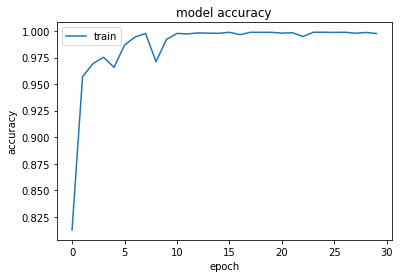

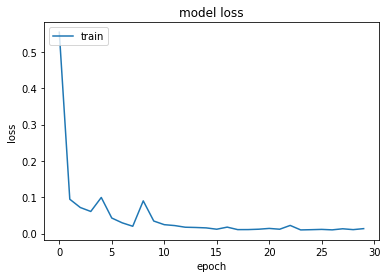

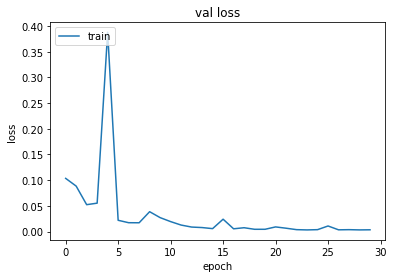

In [10]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['val_loss'])
plt.title('val loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()


In [11]:
# evaluate the keras model
_, accuracy = model.evaluate(x, y)
print('Accuracy: %.2f' % (accuracy*100))

1180/1180 [==============================] - 3s 2ms/step - loss: 0.0096 - accuracy: 0.9990
Accuracy: 99.90


In [12]:
predictions = model.predict(x)

# summarize cases
for i in range(50):
    print('Line %d: %s => %d (expected %d)' % (i+1, x_dataset_base[i].tolist(), predictions[i], y[i]))
#     resultFile.write('\nLine %d: %s => %d (expected %d)' % (i+1, x_dataset_base[i].tolist(), predictions[i], y[i]))

possible_attack_hosts = []
done_values = []
bad_requests = 0
for i, element in enumerate(x_dataset_ips):
    previous_element = x_dataset_ips[i - 1] if i > 0 else None
    current_element = element
    if current_element != previous_element and current_element not in done_values:
        done_values.append(current_element)
        times_appeared = np.count_nonzero(x_dataset_ips == current_element)
        lines_in = np.array(np.where(x_dataset_ips == current_element))
        lines_in_added = np.array([a+1 for a in lines_in])

    #print(f'{current_element} is present {times_appeared} times')
        if times_appeared > 100:
            possible_attack_hosts.append(current_element)
            bad_request_dates = []
            print(f'\nPossible attack host {current_element} with {times_appeared} requests in log lines:\n{lines_in_added}')
#             resultFile.write(f'\nPossible attack host {current_element} with {times_appeared} requests in log lines:\n{lines_in_added}')
#             resultFile.write('\n')
            for line_number in lines_in:
                for numb in line_number:
                    if predictions[numb] == 1:
                        #bad_request_lines = array(numpy.where(predictions == predictions[numb]))
                        bad_requests = bad_requests + 1
                    #for date in x_dataset_dates:
                        bad_request_dates.append(x_dataset_dates[numb])
            print(f'Has {bad_requests} bad requests out of {times_appeared} requests total, with the following access times: \n{bad_request_dates}')
#             resultFile.write(f'Has {bad_requests} bad requests out of {times_appeared} requests total, with the following access times: \n{bad_request_dates}')
#             resultFile.write('\n')
            #print(f'Bad request times: {bad_request_dates}')
        bad_requests = 0
        
        
# resultFile.write(f'\n{(len(x))} rows processed')
# resultFile.write('\nAccuracy: %.2f' % (accuracy*100))

Line 1: ['208.80.193.39', '[25/May/2010:16:50:33 +0100]', 'GET / HTTP/1.0', '403'] => 0 (expected 1)
Line 2: ['82.80.249.160', '[25/May/2010:22:48:54 +0100]', 'GET / HTTP/1.1', '403'] => 0 (expected 1)
Line 3: ['198.186.192.44', '[26/May/2010:02:13:20 +0100]', 'GET / HTTP/1.1', '403'] => 0 (expected 1)
Line 4: ['66.249.71.179', '[26/May/2010:03:36:51 +0100]', 'GET /robots.txt HTTP/1.1', '403'] => 0 (expected 1)
Line 5: ['66.249.71.179', '[26/May/2010:03:36:52 +0100]', 'GET / HTTP/1.1', '403'] => 0 (expected 1)
Line 6: ['198.186.192.44', '[27/May/2010:01:56:54 +0100]', 'GET / HTTP/1.1', '403'] => 0 (expected 1)
Line 7: ['208.80.193.29', '[27/May/2010:03:08:17 +0100]', 'GET / HTTP/1.0', '403'] => 0 (expected 1)
Line 8: ['66.249.68.210', '[27/May/2010:03:46:25 +0100]', 'GET /robots.txt HTTP/1.1', '403'] => 0 (expected 1)
Line 9: ['66.249.68.210', '[27/May/2010:03:46:25 +0100]', 'GET / HTTP/1.1', '403'] => 0 (expected 1)
Line 10: ['198.186.192.44', '[28/May/2010:02:04:30 +0100]', 'GET / HT


Possible attack host 82.154.31.44 with 338 requests in log lines:
[[2395 2396 2398 2399 2400 2401 2402 2403 2404 2405 2406 2407 2408 2409
  2410 2411 2412 2413 2414 2415 2416 2417 2419 2420 2421 2422 2423 2424
  2425 2426 2427 2428 2429 2430 2431 2432 2433 2434 2435 2436 2437 2438
  2440 2441 2442 2443 2444 2445 2446 2447 2448 2449 2450 2451 2452 2453
  2454 2455 2456 2457 2458 2459 2460 2461 2462 2463 2464 2465 2466 2467
  2468 2469 2470 2471 2472 2473 2474 2475 2476 2477 2478 2479 2480 2481
  2482 2483 2484 2485 2486 2487 2488 2489 2490 2494 2495 2497 2498 2499
  2500 2501 2502 2503 2504 2505 2506 2507 2508 2509 2510 2511 2512 2513
  2514 2515 2516 2517 2518 2519 2520 2521 2522 2523 2524 2525 2526 2527
  2528 2529 2530 2531 2532 2533 2534 2535 2536 2537 2538 2539 2540 2541
  2542 2543 2545 2546 2547 2548 2549 2550 2551 2552 2553 2554 2555 2556
  2557 2558 2559 2560 2561 2562 2563 2564 2565 2566 2567 2568 2569 2570
  2571 2572 2573 2574 2575 2576 2577 2578 2579 2580 2581 2582 2583 25


Possible attack host 85.246.29.126 with 101 requests in log lines:
[[13746 13747 13748 13749 13750 13751 13752 13753 13754 13755 13756 13757
  13758 13759 13760 13761 13762 13763 13764 13765 13766 13767 13768 13769
  13770 13771 13772 13773 13774 13775 13776 13777 13778 13779 13780 13781
  13782 13783 13784 13785 13786 13787 13788 13789 13790 13791 13792 13793
  13794 13795 13796 13797 13798 13800 13801 13802 13803 13804 13805 13806
  13807 13808 13809 13810 13811 13812 13813 13814 13815 13816 13817 13818
  13819 13820 13821 13822 13823 13824 13825 13826 13827 13828 13829 13830
  13831 13832 13833 13834 13835 13836 13837 13838 13839 13840 13841 13842
  13843 13844 13845 13846 13847]]
Has 0 bad requests out of 101 requests total, with the following access times: 
[]

Possible attack host 62.249.9.197 with 139 requests in log lines:
[[16477 16478 16479 16480 16481 16482 16483 16484 16485 16486 16487 16488
  16489 16490 16491 16492 16493 16494 16495 16496 16497 16498 16499 16500
  16501 


Possible attack host 194.178.124.236 with 220 requests in log lines:
[[21248 21249 21250 21251 21252 21253 21254 21255 21256 21257 21258 21259
  21260 21261 21262 21263 21264 21265 21266 21267 21268 21269 21270 21271
  21272 21273 21274 21275 21276 21277 21278 21279 21280 21281 21282 21283
  21284 21285 21286 21287 21288 21289 21290 21646 21647 21648 21649 21650
  21651 21652 21653 21654 21655 21656 21657 21658 21659 21660 21661 21662
  21663 21664 21665 21666 21667 21668 21669 21670 21671 21672 21673 21674
  21675 21676 21677 21678 21679 21680 21681 21682 21683 21684 21685 21686
  21687 23115 23116 23117 23118 23119 23120 23121 23122 23123 23124 23125
  23126 23127 23128 23129 23130 23131 23132 23133 23134 23135 23136 23137
  23138 23139 23140 23141 23142 23143 23144 23145 23146 23147 23148 23149
  23150 23151 23152 23153 23154 23155 23156 23157 23158 23159 23160 23161
  23162 23261 23262 23263 23264 23265 23266 23267 23268 23269 23270 23271
  23272 23273 23274 23275 23276 23277 2327


Possible attack host 157.55.39.154 with 146 requests in log lines:
[[30650 30651 30653 30654 30655 30754 30755 30803 30804 30805 30949 30950
  30962 30963 30964 31234 31235 31239 31240 31337 31338 31387 31388 31389
  31401 31402 31450 31451 31452 31650 31651 31652 31653 31654 31815 31816
  31866 31867 31868 31869 31885 31954 31955 32043 32044 32045 32304 32305
  32403 32404 32405 32484 32485 32486 32487 32488 32489 32692 32693 32707
  32708 32709 32774 32775 32824 32825 32826 33018 33019 33029 33030 33031
  33092 33093 33097 33101 33102 33103 33110 33111 33169 33170 33171 33172
  33187 33193 33194 33195 33196 33214 33278 33279 33280 33281 33594 33595
  33598 33599 33600 33601 33676 33728 33729 33730 33787 33788 33847 33848
  33849 33850 33887 33888 33890 33891 33892 33893 33983 33990 33991 33992
  33993 34000 34050 34051 34052 34053 34110 34166 34167 34168 34169 34357
  34358 34410 34411 34412 34946 34947 35068 35069 35070 35137 35138 35141
  35142 35143]]
Has 0 bad requests out of 14